# Aqueous solubility of inorganic compounds at various temperatures

The solubility of 316 common inorganic compounds in water is available as a function of temperature.

Solubility is defined as the concentration of the compound in a solution that is in equilibrium with a solid phase at the specified temperature.

All solubility values are expressed as mass percent of solute, $100 \times w_2$, where
$$
w_2 = \frac{m_2}{m_1 + m_2}
$$
and $m_2$ is the mass of solute and $m_1$ the mass of water.

Reference: Rumble, J. *CRC Handbook of Chemistry and Physics*, 98th Edition, CRC Press LLC, 2017.

## Importing and data available

Please, run the following cell to import the python module written for this data set.

In [1]:
import sys
sys.path.insert(1, '../')

from solutions import solubility_inorganic

The module converts the data to a Pandas data frame `DF` that can be accessed:

In [2]:
solubility_inorganic.DF.head()  # showing only the first five entries with .head()

,Formula,0,10,20,25,30,40,50,60,70,80,90,100
0,AgBrO3,NaN,NaN,NaN,0.193,NaN,NaN,NaN,NaN,NaN,NaN,1.32,NaN
1,AgClO2,0.170,0.31,0.47,0.550,0.64,0.82,1.02,1.22,1.44,1.66,1.88,2.11
2,AgClO3,NaN,NaN,NaN,15.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AgClO4,81.600,83.00,84.20,84.800,85.30,86.30,86.90,87.50,87.90,88.30,88.60,88.80
4,AgNO2,0.155,NaN,NaN,0.413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We are going to assign the previous data frame to a variable `df` in order to easy the future access to this data:

In [3]:
df= solubility_inorganic.DF

All chemical formulas can be seen:

In [4]:
solubility_inorganic.FORMULAS.head()  # showing only the first five entries with .head()

0    AgBrO3
1    AgClO2
2    AgClO3
3    AgClO4
4     AgNO2
Name: Formula, dtype: object

The available temperatures:

In [5]:
solubility_inorganic.TEMPERATURES

[0, 10, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100]

## Indexes

The module receives compounds formulas as a list of strings.

Let's create a list of compounds:

In [6]:
compounds_sample = ['AgNO3', 'NaC2H3O2', 'K2SO4', 'CaBr2', 'Ba(OH)2', 'LiCl']

If only one salt is wanted, pass it as a list with only one string. 

Since the module wraps the data in a Pandas data frame, the data can be manipulated as the user's wish. The module has a function that returns the data frame indexes for each compound. Please, be aware that the indexes are sorted, they correspond to formulas ordered alphabetically by formula even if the list is not sorted.

In [7]:
solubility_inorganic.compounds_indexes(compounds_sample)

array([  5,  25,  32, 129, 143, 208])

## Plotting

With the indexes, the user can code its own plots and do all sorts of data manipulation.

But some plot functionalities are available:

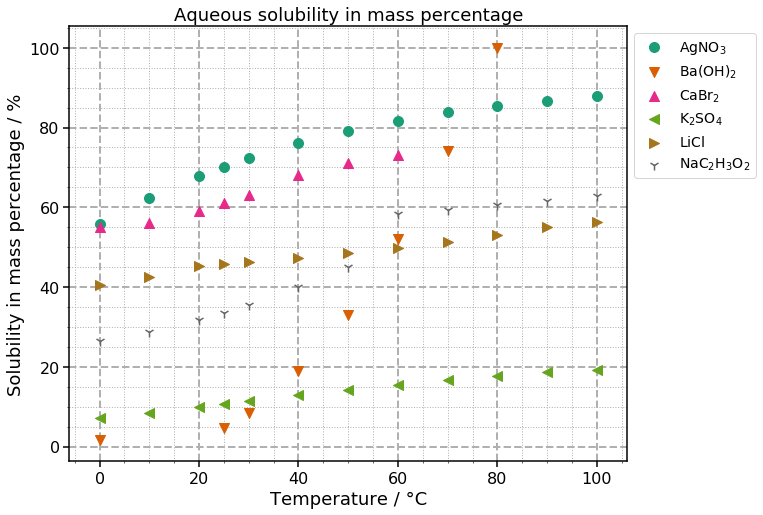

In [8]:
solubility_inorganic.plot(compounds_sample)

As can be seen, if no data is available for some temperature it will be ignored (see $CaBr_2$ and $Ba(OH)_2$). By default, the module does not plots an interpolation together with data points. It can be turned on, plotting a linear interpolation together with data points:

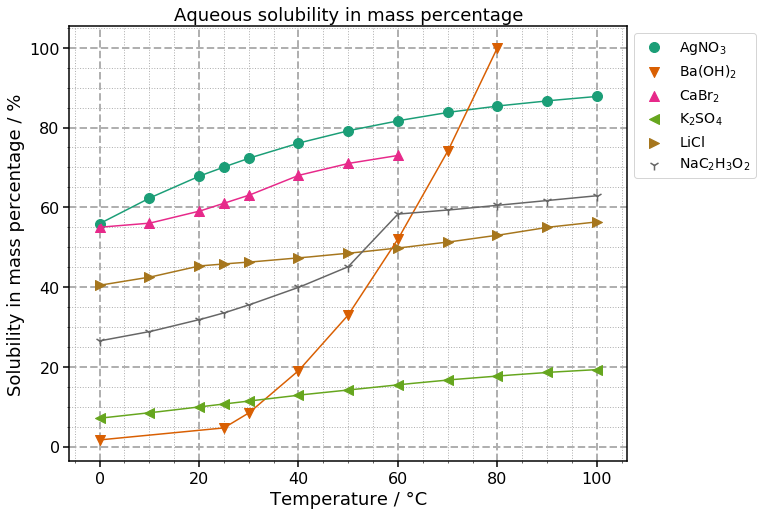

In [9]:
solubility_inorganic.plot(compounds_sample, interpolation=True)

The colors are chosen based on [colormaps](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html). The default is the `Dark2` one but can be changed if the Matplotlib library [pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html) is imported. Let's change it to `jet`:

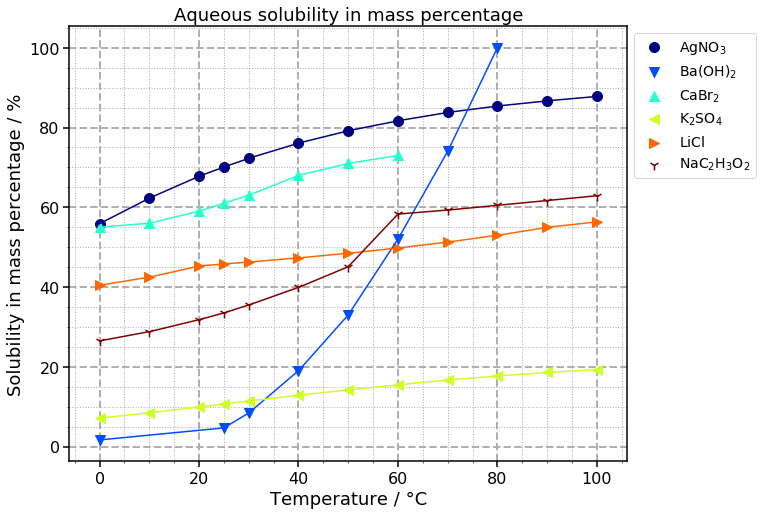

In [10]:
import matplotlib.pyplot as plt

solubility_inorganic.plot(compounds_sample, colors=plt.cm.jet, interpolation=True)

The plot size can be adjusted. Let's repeat the plot with a smaller figure and with another colormap:

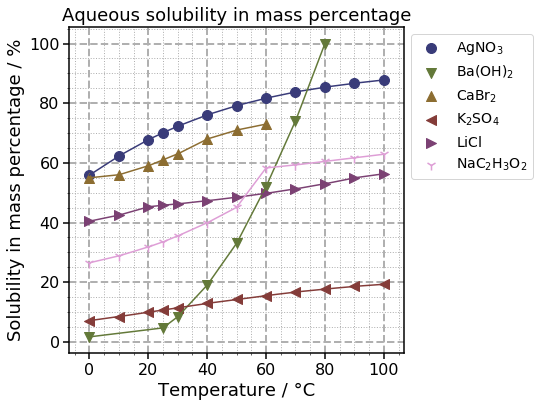

In [11]:
solubility_inorganic.plot(compounds_sample, colors=plt.cm.tab20b, interpolation=True, plot_size=(6,6))

A plot can be saved passing the argument `save_fig` as `True`. The plot will be saved in a folder named `saves` and the filename will be `{unit}_{timestamp}`. 

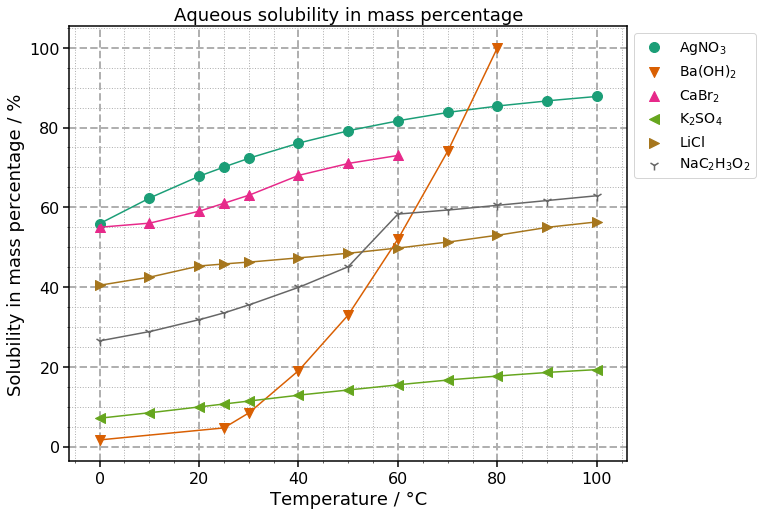

In [12]:
solubility_inorganic.plot(compounds_sample, interpolation=True, save_fig=True)

### Unit convertion and plotting

By default, the plots are in mass percentage (the same unit of the data from literature). Other units are available through convertion: grams of solute per 100 g of water; molality; and mole percentage. It's simple: just pass this argument `unit` with `'solubility'`, `'molality'` or `'mole percentage'` for the units described before.

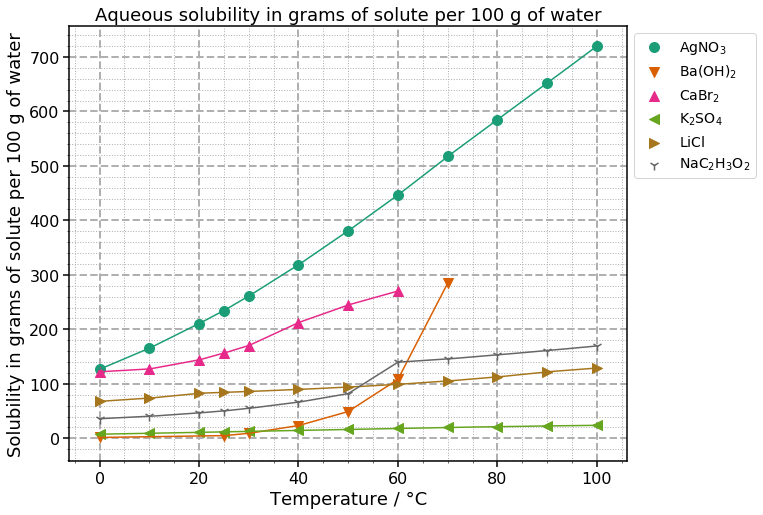

In [13]:
solubility_inorganic.plot(compounds_sample, interpolation=True, unit='solubility')

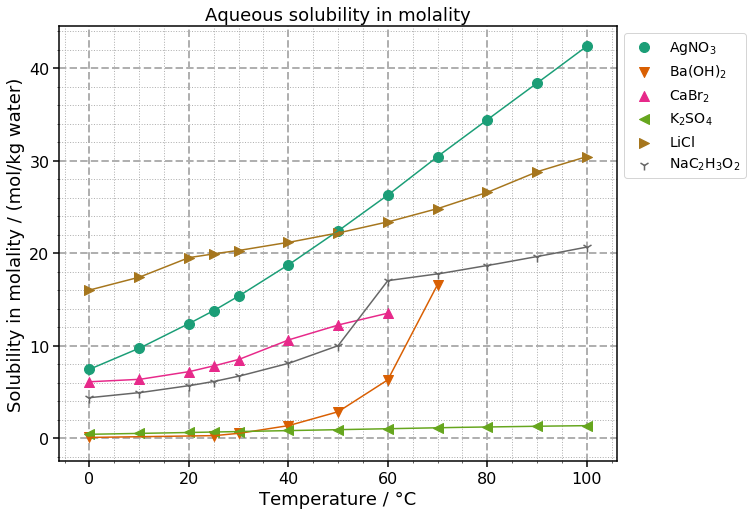

In [14]:
solubility_inorganic.plot(compounds_sample, interpolation=True, unit='molality')

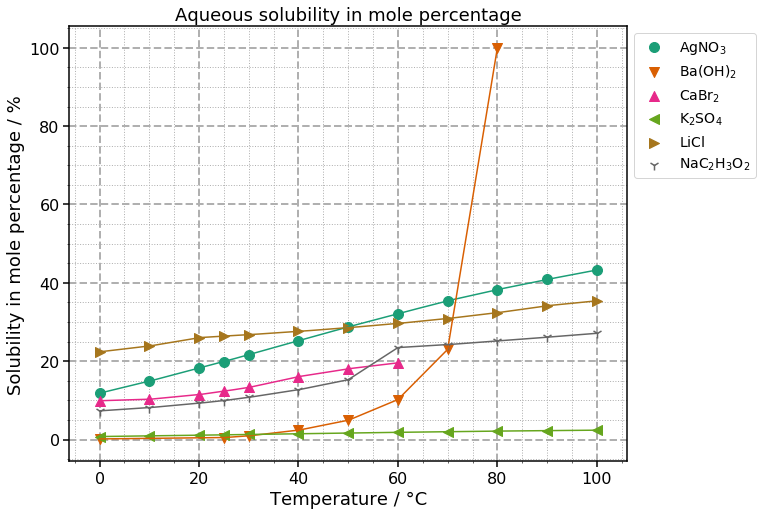

In [15]:
solubility_inorganic.plot(compounds_sample, interpolation=True, unit='mole percentage')

## Filtering and creating substets. Exporting tables.

Since the data is a Pandas data frame, Pandas methods can be used to create subsets. Let's remember the sample compounds indexes in the data frame:

In [16]:
idx = solubility_inorganic.compounds_indexes(compounds_sample)
idx

array([  5,  25,  32, 129, 143, 208])

With indexes, a single command generates a subset with all the data.

In [17]:
df_sample = df.iloc[idx, :]
df_sample

,Formula,0,10,20,25,30,40,50,60,70,80,90,100
5,AgNO3,55.90,62.30,67.80,70.10,72.30,76.1,79.20,81.70,83.80,85.40,86.70,87.80
25,Ba(OH)2,1.67,NaN,NaN,4.68,8.40,19.0,33.00,52.00,74.00,100.00,NaN,NaN
32,CaBr2,55.00,56.00,59.00,61.00,63.00,68.0,71.00,73.00,NaN,NaN,NaN,NaN
129,K2SO4,7.11,8.46,9.95,10.70,11.40,12.9,14.20,15.50,16.70,17.70,18.60,19.30
143,LiCl,40.45,42.46,45.29,45.81,46.25,47.3,48.47,49.78,51.27,52.98,54.98,56.34
208,NaC2H3O2,26.50,28.80,31.80,33.50,35.50,39.9,45.10,58.30,59.30,60.50,61.70,62.90


One can use the `df_subset` function to convert the values to the same units described in the plotting section. The second argument, `''` , means that no mask will be applied (all compounds will be in the output). See below to more details about mask/filtering.

In [18]:
solubility_inorganic.df_subset(df_sample, '', unit='solubility')

,Formula,0,10,20,25,30,40,50,60,70,80,90,100
5,AgNO3,126.757,165.252,210.559,234.448,261.011,318.410,380.769,446.448,517.284,584.932,651.880,719.672
25,Ba(OH)2,1.698,NaN,NaN,4.910,9.170,23.457,49.254,108.333,284.615,inf,NaN,NaN
32,CaBr2,122.222,127.273,143.902,156.410,170.270,212.500,244.828,270.370,NaN,NaN,NaN,NaN
129,K2SO4,7.654,9.242,11.049,11.982,12.867,14.811,16.550,18.343,20.048,21.507,22.850,23.916
143,LiCl,67.926,73.792,82.782,84.536,86.047,89.753,94.062,99.124,105.212,112.675,122.124,129.043
208,NaC2H3O2,36.054,40.449,46.628,50.376,55.039,66.389,82.149,139.808,145.700,153.165,161.097,169.542


As written before, Pandas methods can be used to export the data frame. We can export as a latex table, for example, or to csv, excel and many other formats.

In [19]:
print(solubility_inorganic.df_subset(df_sample, '', unit='solubility').to_latex())

\begin{tabular}{llrrrrrrrrrrrr}
\toprule
{} &   Formula &        0 &       10 &       20 &       25 &       30 &       40 &       50 &       60 &       70 &       80 &       90 &      100 \\
\midrule
5   &     AgNO3 &  126.757 &  165.252 &  210.559 &  234.448 &  261.011 &  318.410 &  380.769 &  446.448 &  517.284 &  584.932 &  651.880 &  719.672 \\
25  &   Ba(OH)2 &    1.698 &      NaN &      NaN &    4.910 &    9.170 &   23.457 &   49.254 &  108.333 &  284.615 &      inf &      NaN &      NaN \\
32  &     CaBr2 &  122.222 &  127.273 &  143.902 &  156.410 &  170.270 &  212.500 &  244.828 &  270.370 &      NaN &      NaN &      NaN &      NaN \\
129 &     K2SO4 &    7.654 &    9.242 &   11.049 &   11.982 &   12.867 &   14.811 &   16.550 &   18.343 &   20.048 &   21.507 &   22.850 &   23.916 \\
143 &      LiCl &   67.926 &   73.792 &   82.782 &   84.536 &   86.047 &   89.753 &   94.062 &   99.124 &  105.212 &  112.675 &  122.124 &  129.043 \\
208 &  NaC2H3O2 &   36.054 &   40.449 &   46.

It's possible to generate a subset based on some criteria. Let's filter all compounds with zinc passing to the function `df_subset` our data frame `df` and a string, `Zn` representing our criteria. The resulting data frame will be assign to a variable for future manipulation:

In [20]:
df_zinc = solubility_inorganic.df_subset(df, 'Zn')
df_zinc

,Formula,0,10,20,25,30,40,50,60,70,80,90,100
305,ZnBr2,79.30,80.100,81.8000,83.0000,84.1000,85.6000,85.8000,86.1,86.3,86.6,86.8,87.1
306,ZnC2O4,NaN,0.001,0.0019,0.0026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,ZnCl2,NaN,76.600,79.0000,80.3000,81.4000,81.8000,82.4000,83.0,83.7,84.4,85.2,86.0
308,Zn(ClO4)2,44.29,NaN,NaN,46.2700,NaN,NaN,48.7000,NaN,NaN,NaN,NaN,NaN
309,ZnF2,NaN,NaN,NaN,1.5300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,ZnI2,81.10,81.200,81.3000,81.4000,81.5000,81.7000,82.0000,82.3,82.6,83.0,83.3,83.7
311,Zn(IO3)2,NaN,NaN,0.5800,0.6400,0.6900,0.7700,0.8200,NaN,NaN,NaN,NaN,NaN
312,Zn(NO3)2,47.80,50.800,54.4000,54.6000,58.5000,79.1000,80.1000,87.5,89.9,NaN,NaN,NaN
313,ZnSO3,NaN,NaN,0.1786,0.1790,0.1794,0.1803,0.1812,NaN,NaN,NaN,NaN,NaN
314,ZnSO4,29.10,32.000,35.0000,36.6000,38.2000,41.3000,43.0000,42.1,41.0,39.9,38.8,37.6


The module has some filters available based on anions or periodic groups names:

In [21]:
solubility_inorganic.show_filters()

Anions filters:  ['acetate', 'arsenate', 'hydrogen arsenate', 'dihydrogen arsenate', 'bicarbonate', 'bromide', 'bromate', 'carbonate', 'chloride', 'hypochlorite', 'chlorite', 'chlorate', 'perchlorate', 'chromate', 'dichromate', 'cyanide', 'fluoride', 'ferrocyanide', 'ferricyanide', 'formate', 'hydroxide', 'iodide', 'iodate', 'periodate', 'nitrite', 'nitrate', 'oxide', 'oxalate', 'permanganate', 'molybdate', 'phosphate', 'hydrogenphosphate', 'dihydrogenphosphate', 'phosphite', 'hydrogenphosphite', 'pyrophosphate', 'selenite', 'selenate', 'sulfide', 'sulfite', 'sulfate', 'hydrogen sulfate', 'borate', 'tetrafluoroborate', 'tetraborate', 'thiocyanate', 'thiosulfate', 'disulfite', 'peroxydisulfate', 'tungstate']

Groups filters: ['group1', 'group2', 'transition_3d', 'transition_4d', 'transition_5d', 'lanthanides', 'actinides', 'halides']


So we can show only zinc halides filtering our previous generated subset:

In [22]:
df_zinc_halides = solubility_inorganic.df_subset(df_zinc, 'halides')
df_zinc_halides

,Formula,0,10,20,25,30,40,50,60,70,80,90,100
305,ZnBr2,79.3,80.1,81.8,83.00,84.1,85.6,85.8,86.1,86.3,86.6,86.8,87.1
307,ZnCl2,NaN,76.6,79.0,80.30,81.4,81.8,82.4,83.0,83.7,84.4,85.2,86.0
309,ZnF2,NaN,NaN,NaN,1.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,ZnI2,81.1,81.2,81.3,81.40,81.5,81.7,82.0,82.3,82.6,83.0,83.3,83.7


Plotting the data. Remember that the `plot` function needs a list of formulas, so the column 'Formula' is passed:

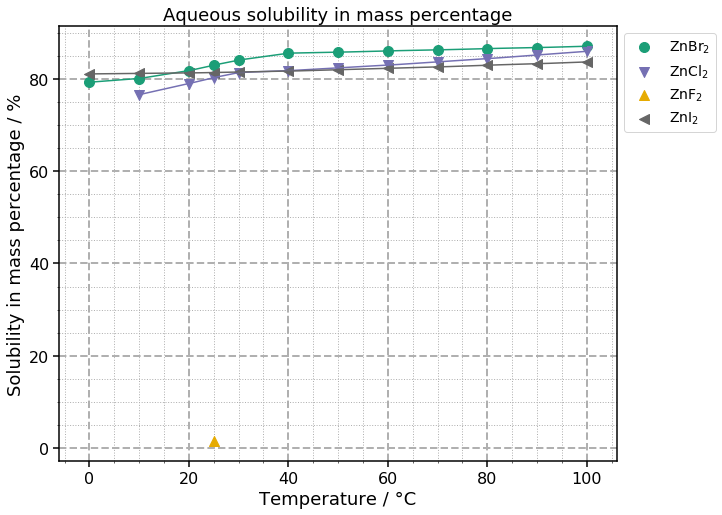

In [23]:
solubility_inorganic.plot(df_zinc_halides['Formula'], interpolation=True)

The graph is odd since there is only one data point available for zinc fluoride. A new graph could be created only with the other halides:

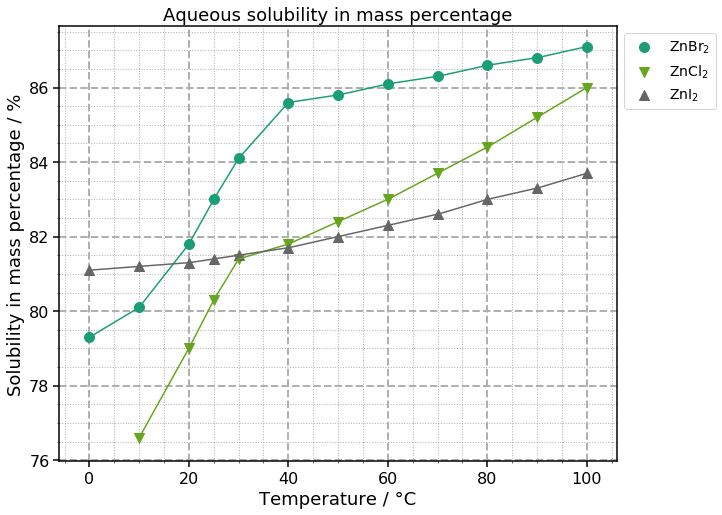

In [24]:
solubility_inorganic.plot(['ZnCl2', 'ZnBr2', 'ZnI2'], interpolation=True)

Another example.

Let's create a subset with group 1 halides. First, filtering all the halides and then filtering for group 1 elements:

In [25]:
df_halides = solubility_inorganic.df_subset(df, 'halides')
df_halides_group1 = solubility_inorganic.df_subset(df_halides, 'group1')
df_halides_group1

,Formula,0,10,20,25,30,40,50,60,70,80,90,100
63,CsBr,NaN,NaN,NaN,55.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,CsCl,61.83,63.480,64.960,65.640,66.29,67.50,68.60,69.61,70.54,71.40,72.21,72.96
68,CsI,30.90,37.200,43.200,45.900,48.60,53.30,57.30,60.70,63.60,65.90,67.70,69.20
104,KBr,35.00,37.300,39.400,40.400,41.40,43.20,44.80,46.20,47.60,48.80,49.80,50.80
107,KCl,21.74,23.610,25.390,26.220,27.04,28.59,30.04,31.40,32.66,33.86,34.99,36.05
110,KF,30.90,39.800,47.300,50.410,53.20,NaN,NaN,NaN,NaN,60.00,NaN,NaN
114,KI,56.00,57.600,59.000,59.700,60.40,61.60,62.80,63.80,64.80,65.70,66.60,67.40
140,LiBr,58.40,60.100,62.700,64.400,65.90,67.80,68.30,69.00,69.80,70.70,71.70,72.80
143,LiCl,40.45,42.460,45.290,45.810,46.25,47.30,48.47,49.78,51.27,52.98,54.98,56.34
146,LiF,0.12,0.126,0.131,0.134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From this subset, let's filter only potassium salts and plot the solubilities:

In [26]:
df_halides_group1_K = solubility_inorganic.df_subset(df_halides_group1, 'K')
df_halides_group1_K

,Formula,0,10,20,25,30,40,50,60,70,80,90,100
104,KBr,35.00,37.30,39.40,40.40,41.40,43.20,44.80,46.2,47.60,48.80,49.80,50.80
107,KCl,21.74,23.61,25.39,26.22,27.04,28.59,30.04,31.4,32.66,33.86,34.99,36.05
110,KF,30.90,39.80,47.30,50.41,53.20,NaN,NaN,NaN,NaN,60.00,NaN,NaN
114,KI,56.00,57.60,59.00,59.70,60.40,61.60,62.80,63.8,64.80,65.70,66.60,67.40


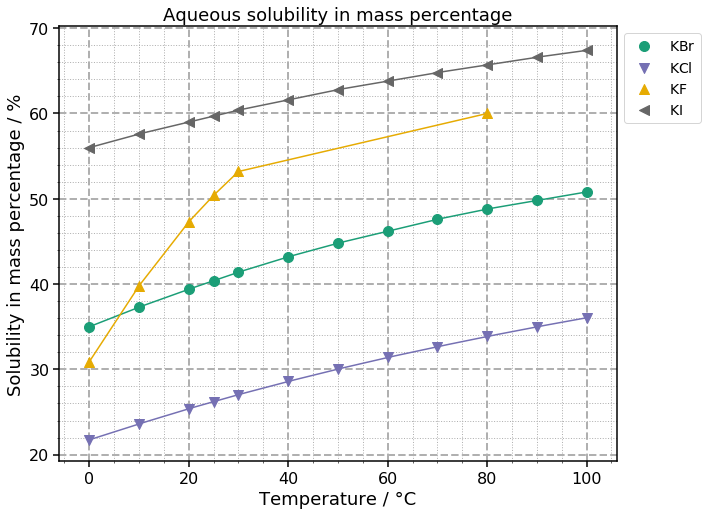

In [27]:
solubility_inorganic.plot(df_halides_group1_K['Formula'], interpolation=True)

One more example. Let's select all the sulfates from the data frame:

In [28]:
df_sulfates = solubility_inorganic.df_subset(df, 'sulfate')
df_sulfates

,Formula,0,10,20,25,30,40,50,60,70,80,90,100
6,Ag2SO4,0.5600,0.6700,0.7800,0.8300,0.8800,0.9700,1.0500,1.130,1.200,1.260,1.320,1.390
11,Al2(SO4)3,27.5000,NaN,NaN,27.8000,28.2000,29.2000,30.7000,32.600,34.900,37.600,40.700,44.200
31,BeSO4,26.6900,27.5800,28.6100,29.2200,29.9000,31.5100,33.3900,35.500,37.780,40.210,42.720,45.280
42,CaSO4,0.1740,0.1910,0.2020,0.2050,0.2080,0.2100,0.2070,0.201,0.193,0.184,0.173,0.163
51,CdSO4,43.1000,43.1000,43.2000,43.4000,43.6000,44.1000,43.5000,42.500,41.400,40.200,38.500,36.700
60,CoSO4,19.9000,23.0000,26.1000,27.7000,29.2000,32.3000,34.4000,35.900,35.500,33.200,30.600,27.800
72,Cs2SO4,62.6000,63.4000,64.1000,64.5000,64.8000,65.5000,66.1000,66.700,67.300,67.800,68.300,68.800
78,CuSO4,12.4000,14.4000,16.7000,18.0000,19.3000,22.2000,25.4000,28.800,32.400,36.300,40.300,43.500
90,FeSO4,13.5000,17.0000,20.8000,22.8000,24.8000,28.8000,32.8000,35.500,33.600,30.400,27.100,24.000
101,Hg2SO4,0.0380,0.0430,0.0480,0.0510,0.0540,0.0590,0.0650,0.070,0.076,0.082,0.088,0.093


From this subset, let's filter only group 2 salts and plot the solubilities:

In [29]:
df_sulfates_group2 = solubility_inorganic.df_subset(df_sulfates, 'group2')
df_sulfates_group2

,Formula,0,10,20,25,30,40,50,60,70,80,90,100
31,BeSO4,26.690,27.580,28.610,29.2200,29.900,31.51,33.390,35.500,37.780,40.210,42.720,45.280
42,CaSO4,0.174,0.191,0.202,0.2050,0.208,0.21,0.207,0.201,0.193,0.184,0.173,0.163
175,MgSO4,18.200,21.700,25.100,26.3000,28.200,30.90,33.400,35.600,36.900,35.900,34.700,33.300
297,SrSO4,NaN,NaN,NaN,0.0135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since the last entry has only one data point, it will be ignored:

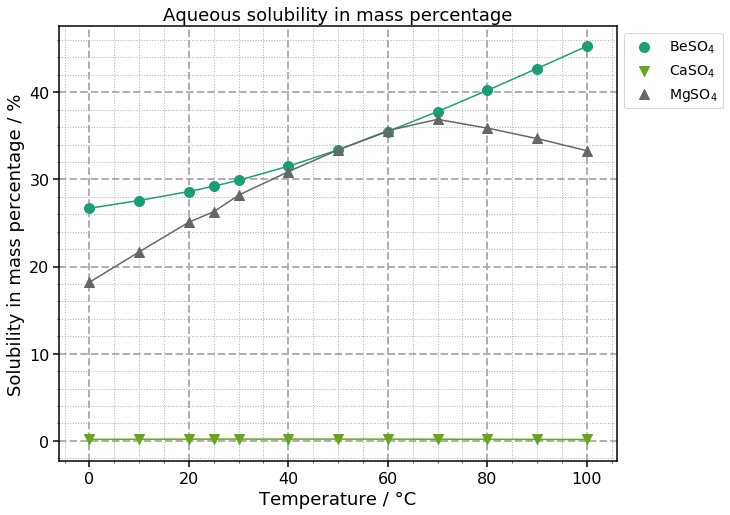

In [30]:
solubility_inorganic.plot(df_sulfates_group2['Formula'][:-1], interpolation=True)

## Solid phase changes

One should be aware that, in the data available from the reference, the solid phase is "generally the most stable crystalline phase at the temperature in question". 

A subset of the data frame is available showing solid phase changes that some compounds have. The data of solid phase changes are from the reference cited at the beginning.

An asterisk* on solubility values in adjacent columns indicates that the solid phase changes between those two temperatures (usually from one hydrated phase to another or from a hydrate to the anhydrous solid). In
such cases the slope of the solubility vs. temperature curve may show a discontinuity.

*The values in this subset are strings, so they are **not** suitable for plotting and mathematical treatment, being just for reference.*

In [31]:
solubility_inorganic.DF_PHASE_CHANGE

,Formula,0,10,20,25,30,40,50,60,70,80,90,100
10,Al(NO3)3,37.0,38.2,39.9,40.8,42.0,44.5,47.3,50.4,53.8*,NaN,NaN,61.5*
22,Ba(IO3)2,0.0182,0.0262,0.0342,0.0396,0.045*,0.058*,0.073,0.090,0.109,0.131,0.156,0.182
33,CaCl2,36.70,39.19,42.13,44.83*,49.12*,52.85*,56.05*,56.73,57.44,58.21,59.04,59.94
34,Ca(ClO3)2,63.2,64.2,65.5,66.3,67.2,69.0,71.0,73.2,75.5*,77.4*,77.7,78.0
38,Ca(IO3)2,0.082,0.155,0.243,0.305,0.384*,0.517*,0.590,0.652,0.811*,0.665*,0.668,NaN
43,CdBr2,36.0,43.0,49.9,53.4,56.4,60.3*,60.3*,60.5,60.7,60.9,61.3,61.6
45,CdCl2,47.2,50.1,53.2,54.6,56.3*,57.3*,57.5,57.8,58.1,58.51,58.98,59.5
53,Ce(NO3)3,57.99,59.80,61.89,63.05,64.31*,67.0*,68.6,71.1*,74.9*,79.2,80.9,83.1
83,FeBr2,NaN,NaN,NaN,54.6*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.8*
84,FeCl2,33.2*,NaN,NaN,39.4*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.7*
